In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [92]:
nyc= pd.read_csv("AB_NYC_2019.csv")
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [93]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [94]:
nyc.describe


<bound method NDFrame.describe of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

In [95]:
nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [96]:
nyc = nyc.dropna(subset=['name', 'host_name'])

In [97]:

nyc['reviews_per_month'].fillna(nyc['reviews_per_month'].median(), inplace =True)

C:\Users\bithi\AppData\Local\Temp\ipykernel_364\814014721.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc['reviews_per_month'].fillna(nyc['reviews_per_month'].median(), inplace =True)
C:\Users\bithi\AppData\Local\Temp\ipykernel_364\814014721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc['reviews_per_month'].fillna(nyc['review

In [98]:
nyc['last_review'].fillna(pd.to_datetime('2022-01-01'), inplace=True)
nyc['last_review'].fillna(nyc['last_review'].mode()[0], inplace=True)

C:\Users\bithi\AppData\Local\Temp\ipykernel_364\1505593886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc['last_review'].fillna(pd.to_datetime('2022-01-01'), inplace=True)
C:\Users\bithi\AppData\Local\Temp\ipykernel_364\1505593886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc['last_review'].fillna(pd.to_datetime('2022-01-01'

In [99]:
nyc['last_review'] = pd.to_datetime(nyc['last_review'])
nyc['last_review'] = nyc['last_review'].apply(lambda b: b.toordinal() if pd.notnull(b) else b)

C:\Users\bithi\AppData\Local\Temp\ipykernel_364\2385554667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc['last_review'] = pd.to_datetime(nyc['last_review'])
C:\Users\bithi\AppData\Local\Temp\ipykernel_364\2385554667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc['last_review'] = nyc['last_review'].apply(lambda b: b.toordinal() if pd.notnull(b) else b)


In [100]:
nyc['last_review'].fillna(nyc['last_review'].median(), inplace=True)
nyc.drop(columns=['last_review'], inplace=True)

C:\Users\bithi\AppData\Local\Temp\ipykernel_364\3224987674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc['last_review'].fillna(nyc['last_review'].median(), inplace=True)
C:\Users\bithi\AppData\Local\Temp\ipykernel_364\3224987674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc['last_review'].fillna(nyc['last_review'].median(),

In [101]:
nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [102]:
nyc.duplicated

<bound method DataFrame.duplicated of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

 

In [103]:
nyc.drop_duplicates(inplace =True)

C:\Users\bithi\AppData\Local\Temp\ipykernel_364\603068289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc.drop_duplicates(inplace =True)


C:\Users\bithi\AppData\Local\Temp\ipykernel_364\1328421610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc['log_price'] = np.log(nyc['price'] + 1)


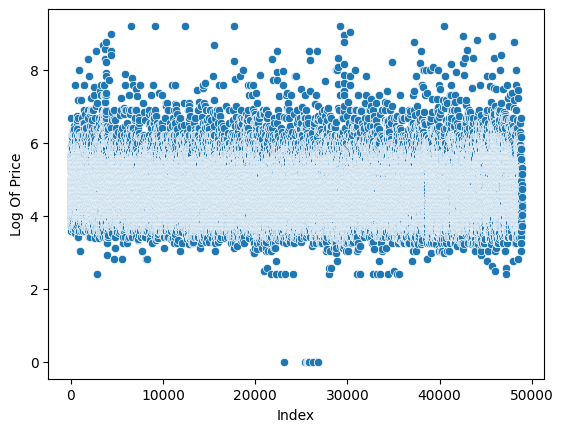

In [104]:
import seaborn as sns
nyc['log_price'] = np.log(nyc['price'] + 1)
sns.scatterplot(x =nyc.index, y=nyc['log_price'])
plt.xlabel('Index')
plt.ylabel('Log Of Price')
plt.show()

In [105]:
outliers = nyc[(nyc['log_price'] <2)  | (nyc['log_price'] >8)]
print(outliers)

             id                                           name    host_id  \
946      363673               Beautiful 3 bedroom in Manhattan     256239   
1862     826690               Sunny, Family-Friendly 2 Bedroom    4289240   
2698    1448703            Beautiful 1 Bedroom in Nolita/Soho      213266   
3537    2110145             UWS 1BR w/backyard + block from CP    2151325   
3695    2224896            NYC SuperBowl Wk 5 Bdrs River View    11353904   
...         ...                                            ...        ...   
45867  34981637    bay ridge & sunset park furnished apartment  263564234   
46533  35297214                      Amazing Chelsea 4BR Loft!  256649546   
46614  35345358                 Northside Williamsburg Stunner     956324   
48043  36056808   Luxury TriBeCa Apartment at an amazing price  271248669   
48304  36189195  Next to Times Square/Javits/MSG! Amazing 1BR!  270214015   

         host_name neighbourhood_group     neighbourhood  latitude  longitu

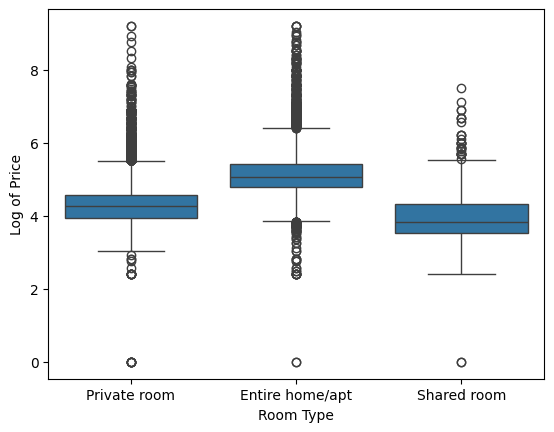

In [106]:
sns.boxplot(x='room_type', y='log_price', data=nyc)
plt.xlabel('Room Type')
plt.ylabel('Log of Price')
plt.show()

In [107]:
Q1 = nyc['log_price'].quantile(0.25)
Q3 = nyc['log_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
nyc_no_outliers = nyc[(nyc['log_price'] >= lower_bound) & (nyc['log_price'] <= upper_bound)]

In [108]:
nyc_dummies = pd.get_dummies(nyc_no_outliers, columns=['room_type'], drop_first=True)


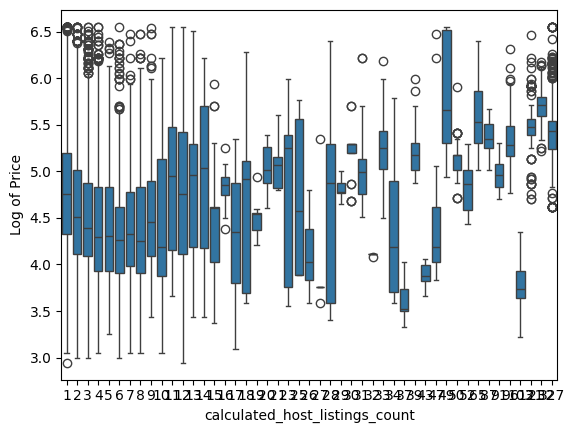

In [109]:
nyc_dummies['price_per_room'] = nyc_dummies['price'] / nyc_dummies['calculated_host_listings_count']
sns.boxplot(x='calculated_host_listings_count', y='log_price', data=nyc_no_outliers)
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Log of Price')
plt.show()

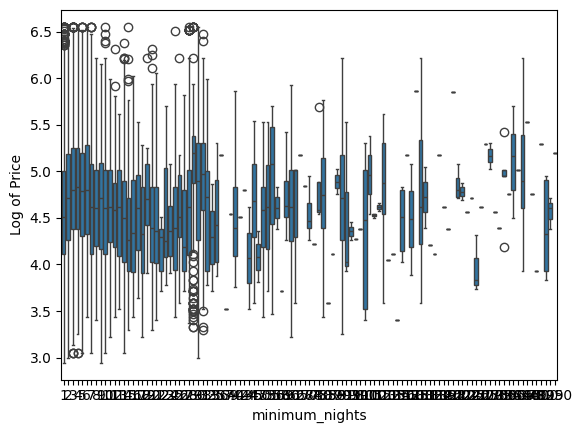

In [110]:
nyc_dummies['price_per_room'] = nyc_dummies['price'] / nyc_dummies['minimum_nights']
sns.boxplot(x='minimum_nights', y='log_price', data=nyc_no_outliers)
plt.xlabel('minimum_nights')
plt.ylabel('Log of Price')
plt.show()